<a href="https://colab.research.google.com/github/Wendell-Mutia/Esophageal-Cancer-Tumor-Analysis/blob/main/EsophagealCancerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary packages

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')


# Display files on drive
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [ ]:
# Read the file into a dataframe

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Esophageal_Dataset.csv")
df.head()

,Unnamed: 0,patient_barcode,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,...,primary_pathology_lymph_node_examined_count,primary_pathology_number_of_lymphnodes_positive_by_he,primary_pathology_number_of_lymphnodes_positive_by_ihc,primary_pathology_planned_surgery_status,primary_pathology_treatment_prior_to_surgery,primary_pathology_residual_tumor,primary_pathology_karnofsky_performance_score,primary_pathology_eastern_cancer_oncology_group,primary_pathology_radiation_therapy,primary_pathology_postoperative_rx_tx
0,0,TCGA-2H-A9GF,2H,A9GF,0500F1A6-A528-43F3-B035-12D3B7C99C0F,YES,C15.5,8140/3,C15.5,NO,...,8.0,7.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
1,1,TCGA-2H-A9GG,2H,A9GG,70084008-697D-442D-8F74-C12F8F598570,YES,C15.5,8140/3,C15.5,NO,...,19.0,4.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
2,2,TCGA-2H-A9GH,2H,A9GH,606DC5B8-7625-42A6-A936-504EF25623A4,YES,C15.5,8140/3,C15.5,NO,...,30.0,1.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
3,3,TCGA-2H-A9GI,2H,A9GI,CEAF98F8-517E-457A-BF29-ACFE22893D49,YES,C15.5,8140/3,C15.5,NO,...,8.0,4.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
4,4,TCGA-2H-A9GJ,2H,A9GJ,EE47CD59-C8D8-4B1E-96DB-91C679E4106F,YES,C15.5,8140/3,C15.5,NO,...,19.0,0.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO


In [ ]:
# Exclude unrelated input data

# initialize an excluded columns array
excluded_columns = []

# General metadata
general_metadata = [
    'Unnamed: 0',
    'patient_barcode',
    'patient_id',
    'bcr_patient_uuid',
    'project'
]

# Collection and consent information
collection_consent_info = [
    'informed_consent_verified',
    'tissue_source_site',
    'tissue_prospective_collection_indicator',
    'tissue_retrospective_collection_indicator'
]

# Geographical and demographic details
geographical_demographics = [
    'country_of_birth',
    'country_of_procurement',
    'state_province_of_procurement',
    'city_of_procurement',
    'race_list',
    'ethnicity'
]

# Patient status and follow-up
patient_status = [
    'vital_status',
    'days_to_last_followup',
    'days_to_death'
]

# Initial diagnosis details
initial_diagnosis = [
    'initial_diagnosis_by',
    'day_of_form_completion',
    'month_of_form_completion',
    'year_of_form_completion'
]

# Cancer staging and related metrics
cancer_staging = [
    'icd_10',
    'stage_event_psa',
    'stage_event_gleason_grading',
    'stage_event_ann_arbor',
    'stage_event_igcccg_stage',
    'stage_event_masaoka_stage'
]

# Stage_event-related columns
stage_event_columns = [
    'stage_event_system_version',
    'stage_event_clinical_stage',
    'stage_event_pathologic_stage',
    'stage_event_tnm_categories',
    'stage_event_psa',
    'stage_event_gleason_grading',
    'stage_event_ann_arbor',
    'stage_event_serum_markers',
    'stage_event_igcccg_stage',
    'stage_event_masaoka_stage'
]
# Primary-pathology-related columns
primary_pathology = [
    'primary_pathology_tumor_tissue_site',
       'primary_pathology_esophageal_tumor_cental_location',
       'primary_pathology_esophageal_tumor_involvement_sites',
       'primary_pathology_histological_type',
       'primary_pathology_columnar_metaplasia_present',
       'primary_pathology_columnar_mucosa_goblet_cell_present',
       'primary_pathology_columnar_mucosa_dysplasia',
       'primary_pathology_neoplasm_histologic_grade',
       'primary_pathology_days_to_initial_pathologic_diagnosis',
       'primary_pathology_age_at_initial_pathologic_diagnosis',
       'primary_pathology_year_of_initial_pathologic_diagnosis',
       'primary_pathology_initial_pathologic_diagnosis_method',
       'primary_pathology_init_pathology_dx_method_other',
       'primary_pathology_lymph_node_metastasis_radiographic_evidence',
       'primary_pathology_primary_lymph_node_presentation_assessment',
       'primary_pathology_lymph_node_examined_count',
       'primary_pathology_number_of_lymphnodes_positive_by_he',
       'primary_pathology_number_of_lymphnodes_positive_by_ihc',
       'primary_pathology_planned_surgery_status',
       'primary_pathology_treatment_prior_to_surgery',
       'primary_pathology_residual_tumor',
       'primary_pathology_karnofsky_performance_score',
       'primary_pathology_eastern_cancer_oncology_group',
       'primary_pathology_radiation_therapy',
       'primary_pathology_postoperative_rx_tx'
]

# Push all individual columns into excluded columns array
excluded_columns.extend(general_metadata)
excluded_columns.extend(collection_consent_info)
excluded_columns.extend(geographical_demographics)
excluded_columns.extend(patient_status)
excluded_columns.extend(initial_diagnosis)
excluded_columns.extend(cancer_staging)
excluded_columns.extend(stage_event_columns)
excluded_columns.extend(primary_pathology)

print(excluded_columns)


['Unnamed: 0', 'patient_barcode', 'patient_id', 'bcr_patient_uuid', 'project', 'informed_consent_verified', 'tissue_source_site', 'tissue_prospective_collection_indicator', 'tissue_retrospective_collection_indicator', 'country_of_birth', 'country_of_procurement', 'state_province_of_procurement', 'city_of_procurement', 'race_list', 'ethnicity', 'vital_status', 'days_to_last_followup', 'days_to_death', 'initial_diagnosis_by', 'day_of_form_completion', 'month_of_form_completion', 'year_of_form_completion', 'icd_10', 'stage_event_psa', 'stage_event_gleason_grading', 'stage_event_ann_arbor', 'stage_event_igcccg_stage', 'stage_event_masaoka_stage', 'stage_event_system_version', 'stage_event_clinical_stage', 'stage_event_pathologic_stage', 'stage_event_tnm_categories', 'stage_event_psa', 'stage_event_gleason_grading', 'stage_event_ann_arbor', 'stage_event_serum_markers', 'stage_event_igcccg_stage', 'stage_event_masaoka_stage', 'primary_pathology_tumor_tissue_site', 'primary_pathology_esophage

## Removing Documentation Features Summary

The following columns were excluded from the analysis for the stated reasons:

1. **Stage and Primary Pathology Columns**:
   - Columns related to 'stage_event' and 'primary_pathology' were excluded due to the lack of clinical knowledge
     necessary to accurately interpret and preprocess these features.
   - These columns often involve complex medical staging systems and detailed pathology data, which can be
     overwhelming for a beginner and may require domain expertise to handle correctly.

2. **Race and Ethnicity Columns**:
   - Columns like 'race_list' and 'ethnicity' were excluded to avoid ethical concerns regarding the use of
     sensitive demographic information. This decision aligns with the principle of minimizing bias in the analysis.

3. **Administrative Columns**:
   - Columns such as 'Unnamed: 0', 'patient_id', 'bcr_patient_uuid', and similar identifiers were excluded because
     they do not provide meaningful insights for the analysis and are primarily used for administrative purposes.
   - Including these columns could introduce noise into the data or lead to unintended bias in machine learning
     models.

4. **Time-Based or Derived Columns**:
   - Columns like 'days_to_last_followup' and 'days_to_death' were excluded as they may require specialized handling
     and could introduce unintended biases, especially in survival analysis contexts.
   - These columns are often highly correlated with outcomes, which could skew the analysis if not handled
     appropriately.

5. **Geographic and Collection Data**:
   - Columns such as 'country_of_birth', 'country_of_procurement', 'state_province_of_procurement', and
     'city_of_procurement' were excluded due to potential concerns about geographical bias.
   - These columns are unlikely to contribute significantly to the analysis of medical or clinical outcomes in this
     context.

6. **Consent and Verification Data**:
   - Columns like 'informed_consent_verified' were excluded as they are administrative fields that do not provide
     analytical value in the context of this study.

### Summary
By excluding these features, we aim to focus on the most relevant and interpretable columns for analysis. This approach minimizes ethical and practical complexities, ensures a more beginner-friendly dataset, and prioritizes features that can be processed without requiring domain-specific expertise.


In [ ]:
# Prepare the training data by separating X (features) and y (Target variable)
X = df.drop(columns=excluded_columns, errors='ignore')
y = df['person_neoplasm_cancer_status']

In [ ]:
X.head()

,icd_o_3_site,icd_o_3_histology,days_to_birth,gender,height,weight,other_dx,history_of_neoadjuvant_treatment,person_neoplasm_cancer_status,tobacco_smoking_history,...,antireflux_treatment_types,h_pylori_infection,barretts_esophagus,goblet_cells_present,history_of_esophageal_cancer,number_of_relatives_diagnosed,has_new_tumor_events_information,has_follow_ups_information,has_drugs_information,has_radiations_information
0,C15.5,8140/3,-24487,MALE,183.0,95.0,No,No,WITH TUMOR,NaN,...,NaN,NaN,No,NaN,NaN,NaN,YES,NO,NO,NO
1,C15.5,8140/3,-24328,MALE,178.0,74.0,No,No,WITH TUMOR,NaN,...,NaN,NaN,Yes-UK,NO,NaN,NaN,YES,NO,NO,NO
2,C15.5,8140/3,-16197,MALE,183.0,91.0,No,No,WITH TUMOR,NaN,...,NaN,NaN,Yes-UK,NaN,NaN,NaN,YES,NO,NO,NO
3,C15.5,8140/3,-25097,MALE,188.0,100.0,No,No,WITH TUMOR,NaN,...,NaN,NaN,Yes-UK,NaN,NaN,NaN,YES,NO,NO,NO
4,C15.5,8140/3,-21180,MALE,189.0,70.0,No,No,WITH TUMOR,NaN,...,NaN,NaN,Yes-UK,NaN,NaN,NaN,YES,NO,NO,NO


In [ ]:
y.head()

,person_neoplasm_cancer_status
0,WITH TUMOR
1,WITH TUMOR
2,WITH TUMOR
3,WITH TUMOR
4,WITH TUMOR


In [ ]:
# Preprocessing - Handling missing values

# Check which feature columns have missing vakues
print("Missing values for the feature columns:")
missing_summary_x = X.isnull().sum()
print(missing_summary_x[missing_summary_x > 0])

# Check the missing values of the target variable column
print("Missing values for the target column:")
missing_summary_y = y.isnull().sum()
print(missing_summary_y[missing_summary_y > 0])




Missing values for the feature columns:
height                                    219
weight                                     40
person_neoplasm_cancer_status             335
tobacco_smoking_history                   380
age_began_smoking_in_years               2253
stopped_smoking_year                     2377
number_pack_years_smoked                 1816
alcohol_history_documented                 60
frequency_of_alcohol_consumption         1516
amount_of_alcohol_consumption_per_day    1877
reflux_history                            677
antireflux_treatment_types               2988
h_pylori_infection                       2428
barretts_esophagus                        818
goblet_cells_present                     3566
history_of_esophageal_cancer              837
number_of_relatives_diagnosed            3146
dtype: int64
Missing values for the target column:
[335]


In [ ]:
# Data Preprocessing - Imputation and/or deletion

# Imputation of Feature columns
# Set the random seed for reproducibility
np.random.seed(0)

# Specify the percentage of missing values to introduce
missing_percentage = 0.1

# Loop through all columns in the DataFrame
for column in X.columns:
    # Calculate the number of rows to make missing
    missing_count = int(len(X) * missing_percentage)

    # Randomly select unique indices to introduce missing values
    missing_indices = np.random.choice(X.index, size=missing_count, replace=False)

    # Save the original values if needed for validation
    original_values = X.loc[missing_indices, column]

    # Replace selected rows in the column with NaN
    X.loc[missing_indices, column] = np.nan

# Verify the changes Before Imputation
print("Missing values before feature (x) imputation:\n")
print(X.isnull().sum())

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

print("\nNumerical columns:")
print(numerical_columns)
print("\nCategorical columns:")
print(categorical_columns)

# Imputation of numerical columns
num_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = num_imputer.fit_transform(X[numerical_columns])

# Imputation of categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = cat_imputer.fit_transform(X[categorical_columns])


# Verify the changes After Imputation
print("\nMissing values after feature (x) imputation:\n")
print(X.isnull().sum())

# Imputation of the target variable column y
# Since y is categorical (binary classification), we use most_frequent strategy

# Verify the changes Before Imputation
print("Missing values before target variable (y) imputation:\n")
print(X.isnull().sum())

if pd.Series(y).isnull().sum() > 0:
    y_imputer = SimpleImputer(strategy='most_frequent')
    # Access the underlying NumPy array using 'values' before reshaping
    y = y_imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Verify the changes After Imputation for y
print("\nMissing values after target variable (y) imputation:\n")
print(pd.Series(y).isnull().sum())

Missing values before feature (x) imputation:

icd_o_3_site                              398
icd_o_3_histology                         398
days_to_birth                             398
gender                                    398
height                                    597
weight                                    434
other_dx                                  398
history_of_neoadjuvant_treatment          398
person_neoplasm_cancer_status             707
tobacco_smoking_history                   743
age_began_smoking_in_years               2439
stopped_smoking_year                     2541
number_pack_years_smoked                 2034
alcohol_history_documented                455
frequency_of_alcohol_consumption         1778
amount_of_alcohol_consumption_per_day    2076
reflux_history                           1005
antireflux_treatment_types               3076
h_pylori_infection                       2571
barretts_esophagus                       1139
goblet_cells_present             

In [ ]:
# Split columns into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (3188, 27)
y_train: (3188,)
X_test: (797, 27)
y_test: (797,)


In [ ]:
# FEATURE ENGINEERING - BMI
# Assuming X contains the features and has columns 'weight' (in kg) and 'height' (in meters)
# If height is in centimeters, convert it to meters first by dividing by 100

# Convert height from cm to meters (if applicable)
X['height'] = X['height'] / 100  # Only do this if height is in cm

# Calculate BMI
X['BMI'] = X['weight'] / (X['height'] ** 2)

# If you want, you can categorize BMI values into categories (optional)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

X['BMI_category'] = X['BMI'].apply(categorize_bmi)

# Verify that the new columns are added
print(X[['weight', 'height', 'BMI', 'BMI_category']].head())


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns in X_train
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit and transform the column using LabelEncoder
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Apply transform to X_test as well



# Encode target variable (y)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Apply the same encoding to y_test

# Now y_train and y_test are encoded



# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Replace Scaled Features
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


   weight    height            BMI BMI_category
0    95.0  0.017216  320530.706331      Obesity
1    74.0  0.017800  233556.369145      Obesity
2    91.0  0.018300  271731.016155      Obesity
3   100.0  0.018800  282933.454052      Obesity
4    70.0  0.018900  195963.158926      Obesity


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
# Model Testing

# Build the model
model = Sequential()

# Add an input layer - number of features is the input size
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add a hidden layer
model.add(Dense(units=32, activation='relu'))

# Add another hidden layer (optional)
model.add(Dense(units=16, activation='relu'))

# Output layer - number of units depends on the output (e.g., for binary classification, 1 unit; for multi-class, equal to number of classes)
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification
# If you have multi-class, use softmax activation: activation='softmax'

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # For binary classification
# For multi-class classification, use categorical_crossentropy for loss: loss='categorical_crossentropy'

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8240 - loss: 0.4860 - val_accuracy: 0.9734 - val_loss: 0.1298
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9751 - loss: 0.1053 - val_accuracy: 0.9781 - val_loss: 0.0755
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9843 - val_loss: 0.0634
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9843 - val_loss: 0.0567
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0358 - val_accuracy: 0.9843 - val_loss: 0.0540
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0253 - val_accuracy: 0.9843 - val_loss: 0.0497
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9843 - val_loss: 0.0476
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0197 - val_accuracy: 0.9843 - val_loss: 0.0505
Epo

In [ ]:
# Output analysis
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0613 
Test loss: 0.06349508464336395
Test accuracy: 0.9849435091018677


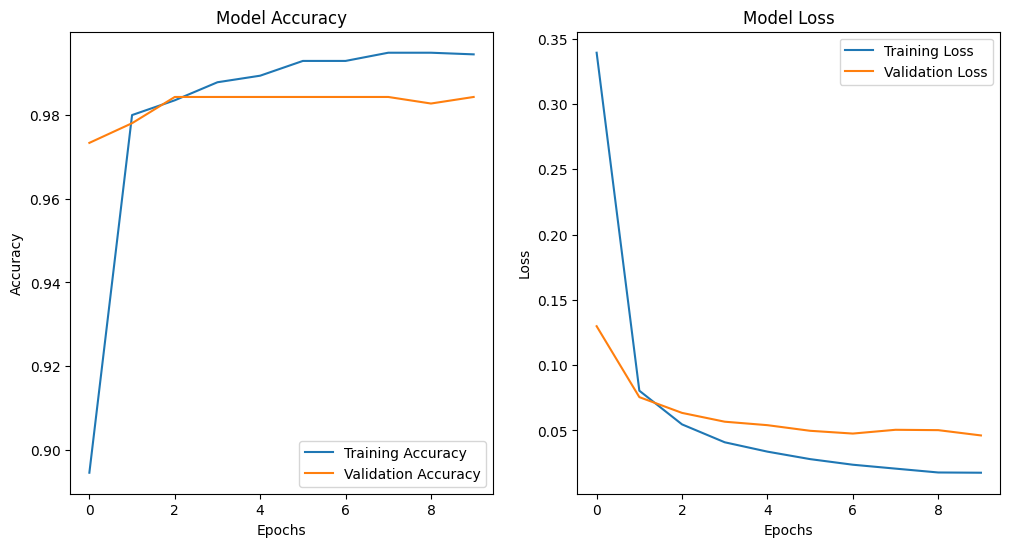

In [ ]:
# Assuming 'history' is the object returned from model.fit()
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


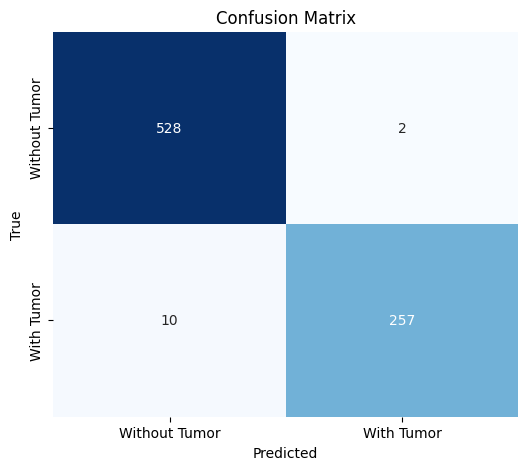

In [ ]:
# Confusion Matrix


# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Without Tumor', 'With Tumor'], yticklabels=['Without Tumor', 'With Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


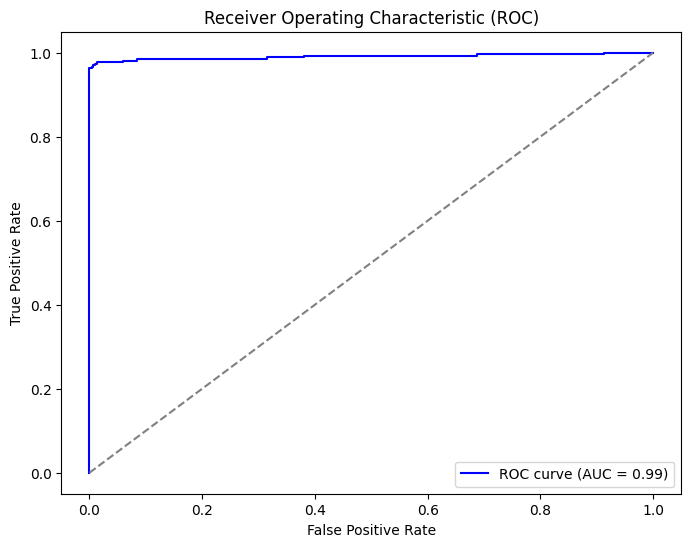

In [ ]:
# ROC Curve
# Predict probabilities for test data
y_prob = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

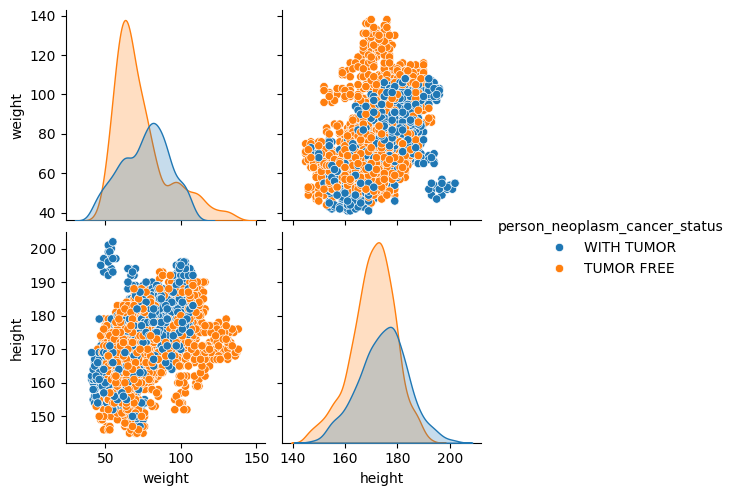

In [ ]:
# prompt: Create a pairplot of any of the input features and show a relationsip of the target variable and add additional comments at the end to explain the graph

# Create the pairplot
sns.pairplot(df, vars=[ 'weight', 'height'], hue='person_neoplasm_cancer_status')
plt.show()

# Additional comments to explain the graph
# This pairplot visualizes the relationships between two selected features ( 'weight', 'height', )
# and shows how these features correlate with the target variable 'person_neoplasm_cancer_status' (with or without tumor).
# Each small subplot represents a pairwise comparison of two features.
# The color of the points in each plot represents the corresponding 'person_neoplasm_cancer_status' (different color for 'with tumor' and 'without tumor').
# This plot helps identify potential patterns and relationships between the features and target variable, aiding in feature selection and model building.
# The diagonal subplots show the distributions of individual features, again colored by 'person_neoplasm_cancer_status' to visualize the difference in the distributions for tumors vs. no tumors.

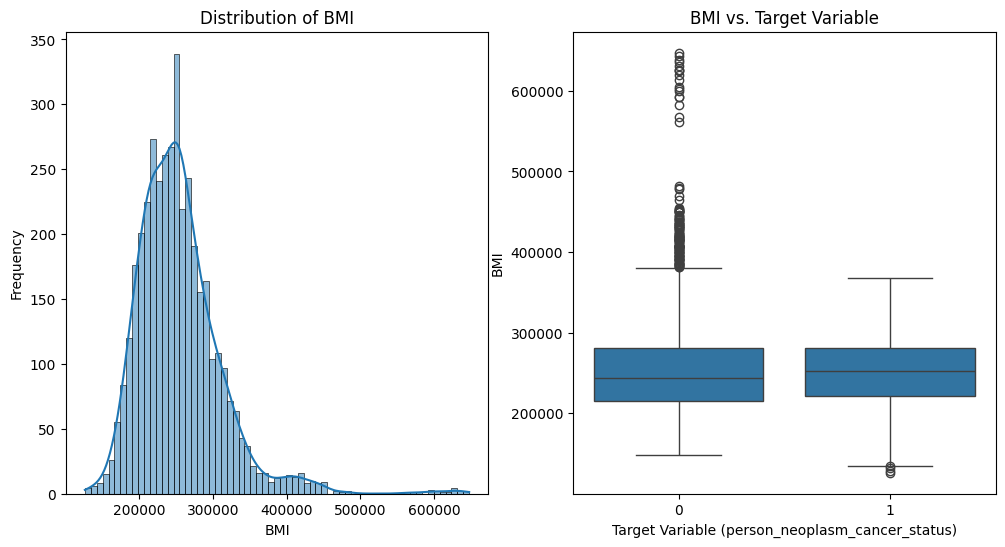

BMI Categories:
< 18.5: Underweight
18.5 - 24.9: Normal weight
25 - 29.9: Overweight
30 or higher: Obesity


In [ ]:
# prompt: visualize the BMI and Target Variable adding comments as to what BMI number is categorized as

# Visualize BMI distribution and its relationship with the target variable
plt.figure(figsize=(12, 6))

# Histogram of BMI
plt.subplot(1, 2, 1)
sns.histplot(X['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Boxplot of BMI vs. Target Variable
plt.subplot(1, 2, 2)
sns.boxplot(x=y, y=X['BMI'])
plt.title('BMI vs. Target Variable')
plt.xlabel('Target Variable (person_neoplasm_cancer_status)')
plt.ylabel('BMI')

plt.show()

# Add comments to categorize BMI numbers
print("BMI Categories:")
print("< 18.5: Underweight")
print("18.5 - 24.9: Normal weight")
print("25 - 29.9: Overweight")
print("30 or higher: Obesity")

In [ ]:
#print X columns
print(X.columns)

Index(['icd_o_3_site', 'icd_o_3_histology', 'days_to_birth', 'gender',
       'height', 'weight', 'other_dx', 'history_of_neoadjuvant_treatment',
       'person_neoplasm_cancer_status', 'tobacco_smoking_history',
       'age_began_smoking_in_years', 'stopped_smoking_year',
       'number_pack_years_smoked', 'alcohol_history_documented',
       'frequency_of_alcohol_consumption',
       'amount_of_alcohol_consumption_per_day', 'reflux_history',
       'antireflux_treatment_types', 'h_pylori_infection',
       'barretts_esophagus', 'goblet_cells_present',
       'history_of_esophageal_cancer', 'number_of_relatives_diagnosed',
       'has_new_tumor_events_information', 'has_follow_ups_information',
       'has_drugs_information', 'has_radiations_information', 'BMI',
       'BMI_category'],
      dtype='object')


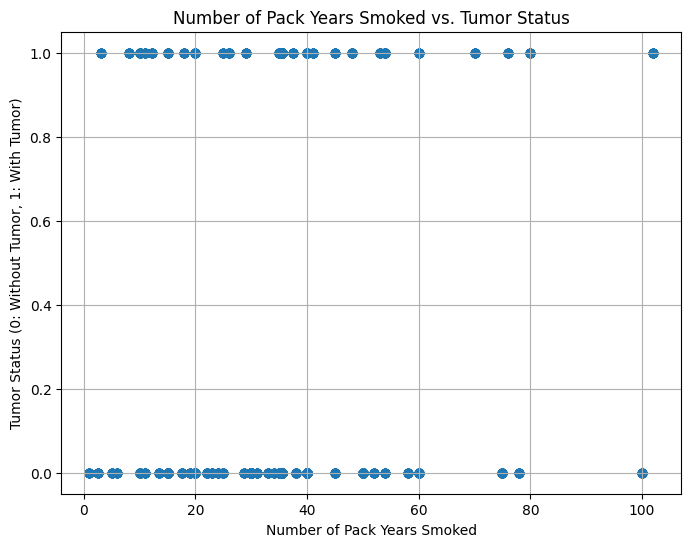

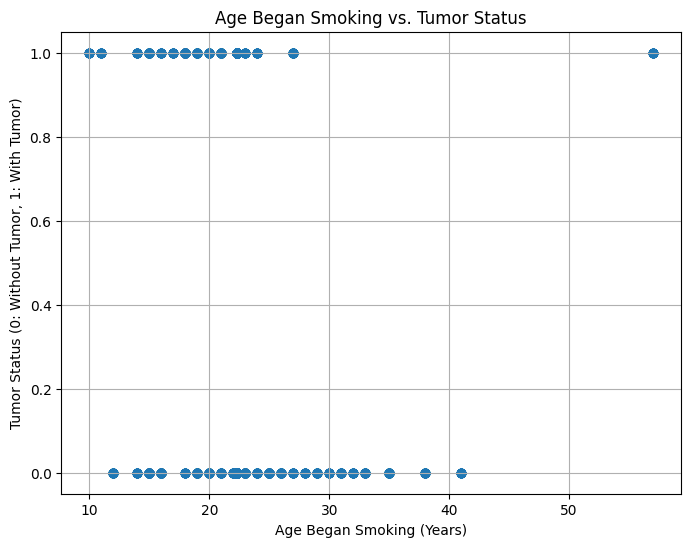

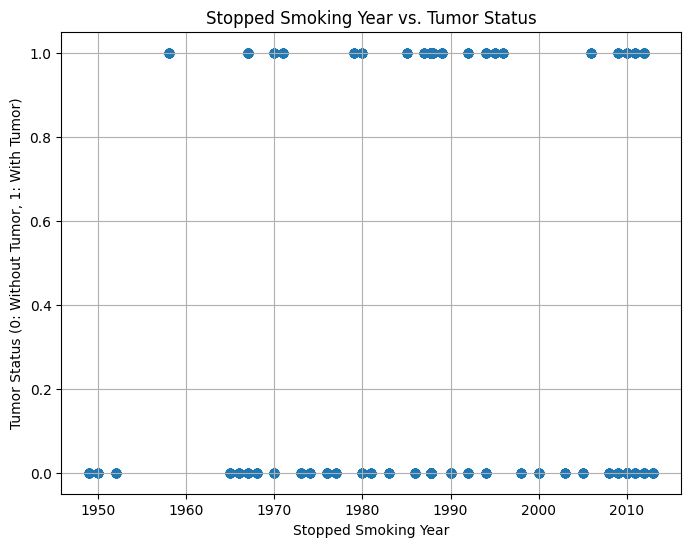

In [ ]:
# prompt: Create a scatter plot to show that number_pack_years_smoked (x input) could correlate to having tumors versus not having tumors

# Assuming 'X' and 'y' are already defined and preprocessed as in your code.

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X['number_pack_years_smoked'], y, alpha=0.7)  # Use alpha for transparency
plt.xlabel('Number of Pack Years Smoked')
plt.ylabel('Tumor Status (0: Without Tumor, 1: With Tumor)')  # Assuming 0/1 encoding
plt.title('Number of Pack Years Smoked vs. Tumor Status')
plt.grid(True)
plt.show()

# prompt: Create a scatter plot to show that age_began_smoking_in_years (x input) could correlate to having tumors versus not having tumors

# Assuming 'X' and 'y' are already defined and preprocessed as in your code.
plt.figure(figsize=(8, 6))
plt.scatter(X['age_began_smoking_in_years'], y, alpha=0.7)  # Use alpha for transparency
plt.xlabel('Age Began Smoking (Years)')
plt.ylabel('Tumor Status (0: Without Tumor, 1: With Tumor)')  # Assuming 0/1 encoding
plt.title('Age Began Smoking vs. Tumor Status')
plt.grid(True)
plt.show()

# prompt: Create a scatter plot to show that stopped_smoking_year (x input) could correlate to having tumors versus not having tumors

# Assuming 'X' and 'y' are already defined and preprocessed as in your code.
plt.figure(figsize=(8, 6))
plt.scatter(X['stopped_smoking_year'], y, alpha=0.7)  # Use alpha for transparency
plt.xlabel('Stopped Smoking Year')
plt.ylabel('Tumor Status (0: Without Tumor, 1: With Tumor)')  # Assuming 0/1 encoding
plt.title('Stopped Smoking Year vs. Tumor Status')
plt.grid(True)
plt.show()

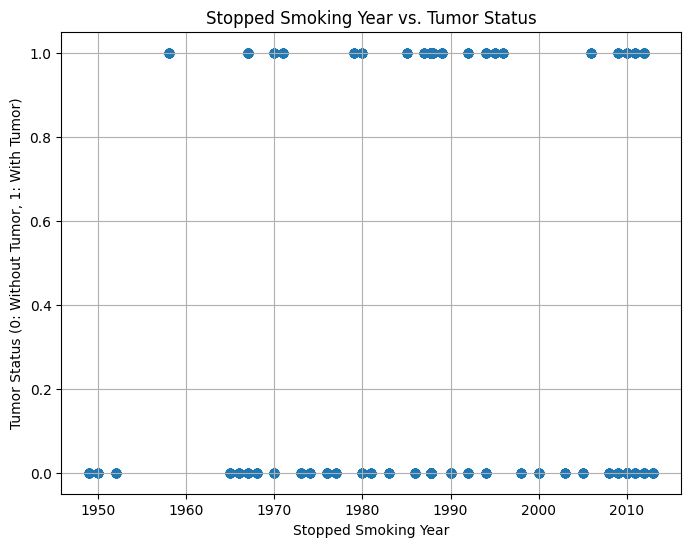

In [ ]:
# prompt: Create a scatter plot to show that stopped_smoking_year (x input) could correlate to having tumors versus not having tumors

# Assuming 'X' and 'y' are already defined and preprocessed as in your code.
plt.figure(figsize=(8, 6))
plt.scatter(X['stopped_smoking_year'], y, alpha=0.7)  # Use alpha for transparency
plt.xlabel('Stopped Smoking Year')
plt.ylabel('Tumor Status (0: Without Tumor, 1: With Tumor)')  # Assuming 0/1 encoding
plt.title('Stopped Smoking Year vs. Tumor Status')
plt.grid(True)
plt.show()

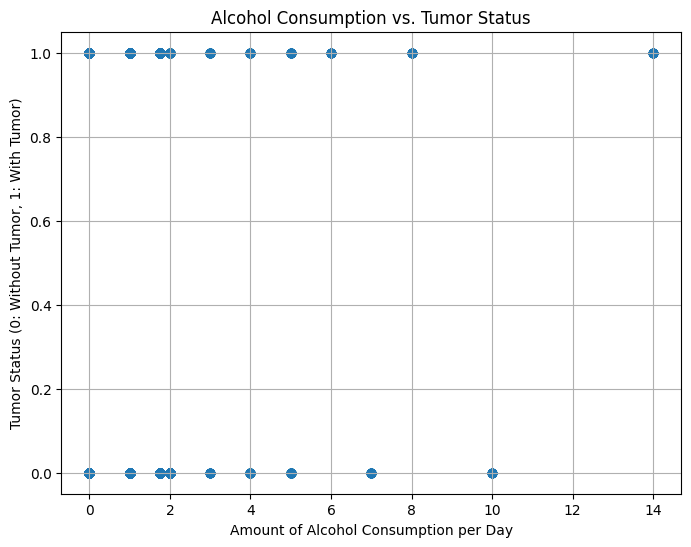

In [ ]:
# prompt: Create a scatter plot to show that amount_of_alcohol_consumption_per_day (x input) could correlate to having tumors versus not having tumors

# Assuming 'X' and 'y' are already defined and preprocessed as in your code.

plt.figure(figsize=(8, 6))
plt.scatter(X['amount_of_alcohol_consumption_per_day'], y, alpha=0.7)
plt.xlabel('Amount of Alcohol Consumption per Day')
plt.ylabel('Tumor Status (0: Without Tumor, 1: With Tumor)')
plt.title('Alcohol Consumption vs. Tumor Status')
plt.grid(True)
plt.show()